In [ ]:
!pip3 install snscrape     #twitterdan tweet kazıyabilmek için kullanmamız gereken kütüphane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.9 MB/s 


In [98]:
import snscrape.modules.twitter as sntwitter #twitterdan tweet kazıma yapabilmemiz için gerekli kütüphane
import pandas as pd
from datetime import date, timedelta         #çekilecek tweetler tarihlere göre filtrelendiği için kütüphaneyi import ediyoruz 
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.auto import tqdm                   #döngüyü kullanarak bir progressbar yaratır ve bize %kaç ilerlediğimizi gösterir 
#https://github.com/tqdm/tqdm

In [ ]:
#tweetlerin çekileceği accountlar 
spor_accounts=["trtspor","ntvspor","sporarena","buzzspor","bptsport","aa_spor","futbolarena","demarkesports"]
ekonomi_accounts=["HurriyetEkonomi","BloombergHT","InvestingTR","ForeksTurkey","aa_finans","ekonomiHTcom","NTVPara","CapitalDergisi"]
siyaset_accounts=["siyasetekrani","etkilihaber","akdenizpolitik","politikyol","gazetekritik","kozmopolitikcom","politikyol","kozmopolitikcom"]
teknoloji_bilim_accounts=["NTVTeknoloji","TeknolojiStar","bilimgenc","donanimhaber","TechnopatNet","shiftdeletenet","KutadguBilim","PopSciT"]

#accountlar dictionarye ekleniyor
accounts=dict({"spor":spor_accounts,"ekonomi":ekonomi_accounts,"siyaset":siyaset_accounts,"teknoloji & bilim":teknoloji_bilim_accounts})

In [ ]:
def get_tweet(day,account,category):
    query = "(from:"+ account +") until:"+str(day) #twitterda arama yapılacak format örn:(from:elonmusk until:2022-12-17)
    tweets = []
    limit = 16                                     #Verilen tarih için bir hesaptan çekilecek olan tweet miktarı
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
            
        if len(tweets) == limit:                   #istenilen tweet sayısına ulaşıldığında döngüden çık
            break
        else:
            tweets.append([pd.to_datetime(tweet.date), tweet.user.username, tweet.content, category]) #tweets listesine çekilen tweetleri ekle
                
    return tweets                                  #çekilmiş olan tweetlerin bulunduğu listeyi return et

In [ ]:
tweets=[]
start_date = date(2022, 1, 1) 
end_date = date(2022, 12, 31)    #Alınacak tweetlerin tarih aralığı seçiliyor

delta = end_date - start_date    #Verilen tarihler arasında kaç gün olduğu hesaplanıyor
acc_sayac=0                      #Bir accounttan birden fazla defa veri çekildiği için dairesel liste kullanmalıyız. Account listesi bittiğinde başa dönmesi gerekir bu yüzden bir sayac ekleniyor

In [ ]:
#Tqdm döngüyü kullanarak bir progressbar yaratır ve bize % kaç ilerlediğimizi konsolda gösterir
for k in tqdm(accounts,desc="Kategoriler"):
    for i in tqdm(range(delta.days + 1),desc=k):       #İki tarih arasındaki gün sayısı kadar dönüyor
        day = start_date + timedelta(days=i)      #Her tarihten tweet almak istenildiği için tarihi ilerletiliyor
        tweets.append(get_tweet(day,accounts[k][acc_sayac],k)) # get_tweet fonksiyonunu istenilen kriterlere göre çağırılıyor
        acc_sayac+=1
        if(acc_sayac==len(accounts[k])):          #accounts sözlüğü içerisindeki hesaplar geziliyor ve Son accounta gelindiğinde tekrar başa dön diyerek dairesel liste oluşturuluyor
            acc_sayac=0

Kategoriler:   0%|          | 0/4 [00:00<?, ?it/s]

spor:   0%|          | 0/365 [00:00<?, ?it/s]

ekonomi:   0%|          | 0/365 [00:00<?, ?it/s]

siyaset:   0%|          | 0/365 [00:00<?, ?it/s]

teknoloji & bilim:   0%|          | 0/365 [00:00<?, ?it/s]

In [ ]:
newlist = list(np.concatenate(tweets))                                   #çok boyutlu liste tek boyutlu listeye dönüştürülüyor
df = pd.DataFrame(newlist, columns=['Date', 'User', 'Tweet',"Category"]) #Liste dataframe dönüştürülüyor

In [100]:
df.Category.value_counts()

spor                 5840
ekonomi              5840
siyaset              5840
teknoloji & bilim    5840
Name: Category, dtype: int64

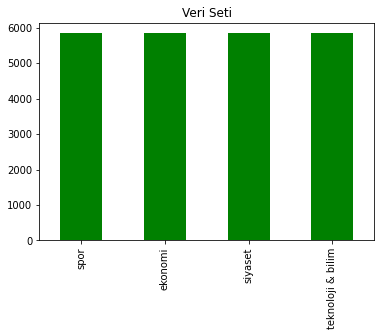

In [99]:
# Verisetinin grafiği 

df.Category.value_counts().plot(kind = 'bar',
        x = 'Kategoriler',
        y = 'Veri Miktarı',
        color = 'green')
plt.title('Veri Seti')
plt.show()

In [101]:
df.head(-5)

,Date,User,Tweet,Category
0,2021-12-31 21:20:00+00:00,trtspor,Mikrofon Elvir Balic'te 🎵🎶\n\nGüzel bir sahne ...,spor
1,2021-12-31 20:50:00+00:00,trtspor,Futbolda nadiren yaşanan anlardan birine bu yı...,spor
2,2021-12-31 20:40:00+00:00,trtspor,🔙 Yıl 1992... ❝Spor Stüdyosu❞ programı. \n\n🎙 ...,spor
3,2021-12-31 20:30:00+00:00,trtspor,📆 2021 yılı sadece olağan spor olaylarına deği...,spor
4,2021-12-31 20:20:00+00:00,trtspor,"😯📸 Spor dünyasında, 2021 yılından akılda kalan...",spor
...,...,...,...,...
23350,2022-12-18 18:04:59+00:00,donanimhaber,Samsung Galaxy M23 5G için Android 13 güncelle...,teknoloji & bilim
23351,2022-12-18 17:35:00+00:00,donanimhaber,Yeni robotik teknoloji rüzgar türbinlerinin ba...,teknoloji & bilim
23352,2022-12-18 17:05:00+00:00,donanimhaber,Guerrilla Games doğruladı: Multiplayer Horizon...,teknoloji & bilim
23353,2022-12-18 16:35:00+00:00,donanimhaber,"Pepsi, 2023’te 100 adet Tesla Semi elektrikli ...",teknoloji & bilim


In [ ]:
df.to_csv('all_tweets.csv')                                              #dataframe csv dosyası olarak kaydediliyor.